In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [87]:
df = pd.read_csv('crop_yield.csv')

going to view and explore the data here

In [88]:
# first i just want to previous and see what it looks like
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [89]:
# now im going to check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [90]:
# going to look at statistics and barplot the outliers
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


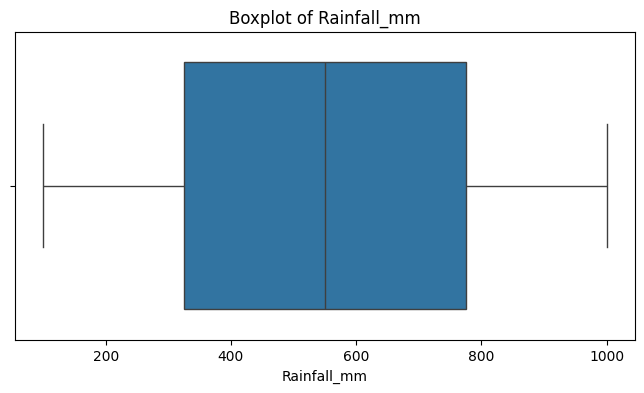

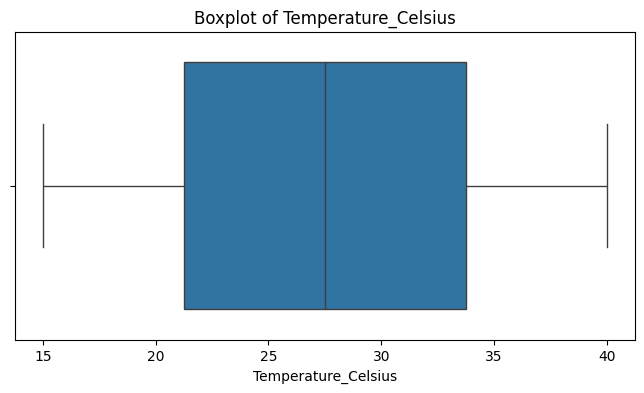

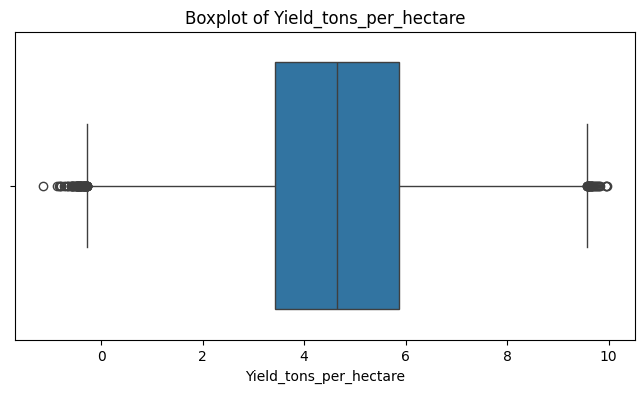

In [91]:
numerical_columns = ['Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

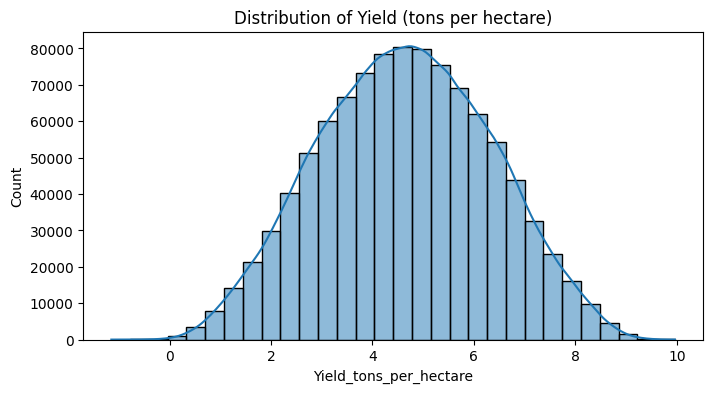

c:\Users\des\Documents\GitHub\destinee-b.github.io\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


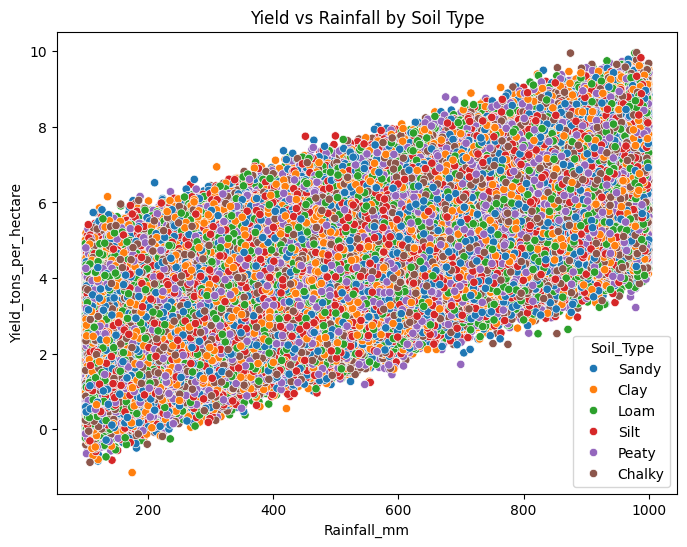

In [92]:
# going to view the distribution and relationships of the data
plt.figure(figsize=(8, 4))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, bins=30)
plt.title("Distribution of Yield (tons per hectare)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rainfall_mm', y='Yield_tons_per_hectare', hue='Soil_Type')
plt.title("Yield vs Rainfall by Soil Type")
plt.show()

# pre processing

In [93]:
#check unique values in categorical columns
for col in ['Soil_Type', 'Crop']:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Soil_Type:
Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64


Unique values in Crop:
Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64




In [94]:
#convert all bool columns to an int
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

df_encoded = pd.get_dummies(
    df,
    columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'],
    drop_first=True
)

bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


df_encoded.dtypes

Rainfall_mm                float64
Temperature_Celsius        float64
Fertilizer_Used              int64
Irrigation_Used              int64
Days_to_Harvest              int64
Yield_tons_per_hectare     float64
Region_North                 int64
Region_South                 int64
Region_West                  int64
Soil_Type_Clay               int64
Soil_Type_Loam               int64
Soil_Type_Peaty              int64
Soil_Type_Sandy              int64
Soil_Type_Silt               int64
Crop_Cotton                  int64
Crop_Maize                   int64
Crop_Rice                    int64
Crop_Soybean                 int64
Crop_Wheat                   int64
Weather_Condition_Rainy      int64
Weather_Condition_Sunny      int64
dtype: object

In [95]:
# change categorical variables to numerical
df = pd.get_dummies(df, columns=['Soil_Type', 'Weather_Condition', 'Crop'], drop_first=True)

In [96]:
# remove any duplicates
df = df.drop_duplicates()

In [97]:
# going to check how many missing values are in each column now
df_encoded.isnull().sum()

Rainfall_mm                0
Temperature_Celsius        0
Fertilizer_Used            0
Irrigation_Used            0
Days_to_Harvest            0
Yield_tons_per_hectare     0
Region_North               0
Region_South               0
Region_West                0
Soil_Type_Clay             0
Soil_Type_Loam             0
Soil_Type_Peaty            0
Soil_Type_Sandy            0
Soil_Type_Silt             0
Crop_Cotton                0
Crop_Maize                 0
Crop_Rice                  0
Crop_Soybean               0
Crop_Wheat                 0
Weather_Condition_Rainy    0
Weather_Condition_Sunny    0
dtype: int64

In [98]:
# fixing missing values by filling them with the mean of the column
df_encoded.fillna(df_encoded.mean(numeric_only=True), inplace=True)

In [99]:
# i did some research and found that regressions models can be sensitive to some columbs being too large or small, so i will scale the data to make for better results
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler

# going to create an obkect of the scaler and apply it to all the features except the target variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('Yield_tons_per_hectare', axis=1))
# going to create a new dataframe with the scaled features and the target variable
X = pd.DataFrame(scaled_features, columns=df_encoded.drop('Yield_tons_per_hectare', axis=1).columns)

In [100]:
# going to set the target variable
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

In [101]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# building and training the model

In [102]:
X_train.dtypes

Region                      object
Rainfall_mm                float64
Temperature_Celsius        float64
Fertilizer_Used              int64
Irrigation_Used              int64
Days_to_Harvest              int64
Soil_Type_Clay                bool
Soil_Type_Loam                bool
Soil_Type_Peaty               bool
Soil_Type_Sandy               bool
Soil_Type_Silt                bool
Weather_Condition_Rainy       bool
Weather_Condition_Sunny       bool
Crop_Cotton                   bool
Crop_Maize                    bool
Crop_Rice                     bool
Crop_Soybean                  bool
Crop_Wheat                    bool
dtype: object

In [103]:
# going to create the model and train it here

X = df_encoded.drop('Yield_tons_per_hectare', axis=1)
y = df_encoded['Yield_tons_per_hectare'].astype(float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

predictions 

In [104]:
# going to predict crop yield on the test set 
y_pred = lr_model.predict(X_test)

evaluation

In [105]:
# going to evaluate the model using MSE, RMSE, and r2 score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.25
Root Mean Squared Error (RMSE): 0.50
R-squared (R²): 0.91


In [106]:
# going to view comparisons of the predicted and actual values and view the first few rows
comparison_df = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

comparison_df.head(10)


,Actual Yield,Predicted Yield
0,3.840988,4.047939
1,5.138173,4.763869
2,6.401523,7.194732
3,2.658805,2.554694
4,2.797703,4.120185
5,7.691631,6.821580
6,6.338488,6.655784
7,5.495826,6.178427
8,9.076388,7.848795
9,3.970273,3.811813


# visualizations

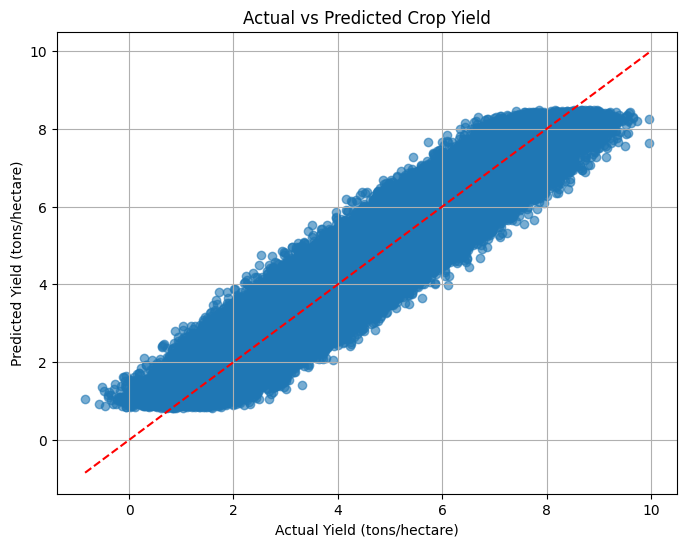

In [107]:
# going to choose a scatterplot to visualize the predicted vs actual values as i think it is an easy way to see how well the model is performing and view
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Yield (tons/hectare)")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.title("Actual vs Predicted Crop Yield")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal prediction line
plt.grid(True)
plt.show()

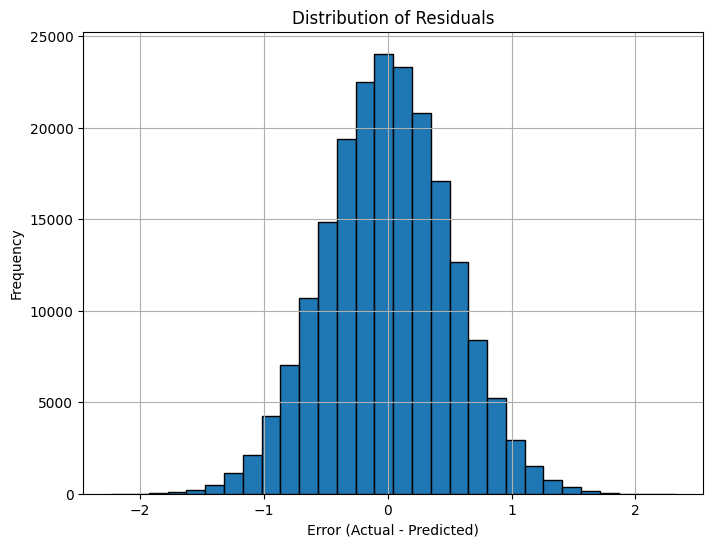

In [108]:
# going to plot the residuals to see if they are normally distributed and if there are any patterns in the data
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

going to  look at feature coefficients now to see how much each feature impacts the target, i did some research and seen this was recommended, will attach url for documentation i used
https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [109]:
# going to create a dataframe of feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,  
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# display the top positive and negative coefficients and plot them
print(coef_df.head())

               Feature  Coefficient
2      Fertilizer_Used     1.499406
3      Irrigation_Used     1.199223
1  Temperature_Celsius     0.019936
0          Rainfall_mm     0.004997
8       Soil_Type_Clay     0.003190


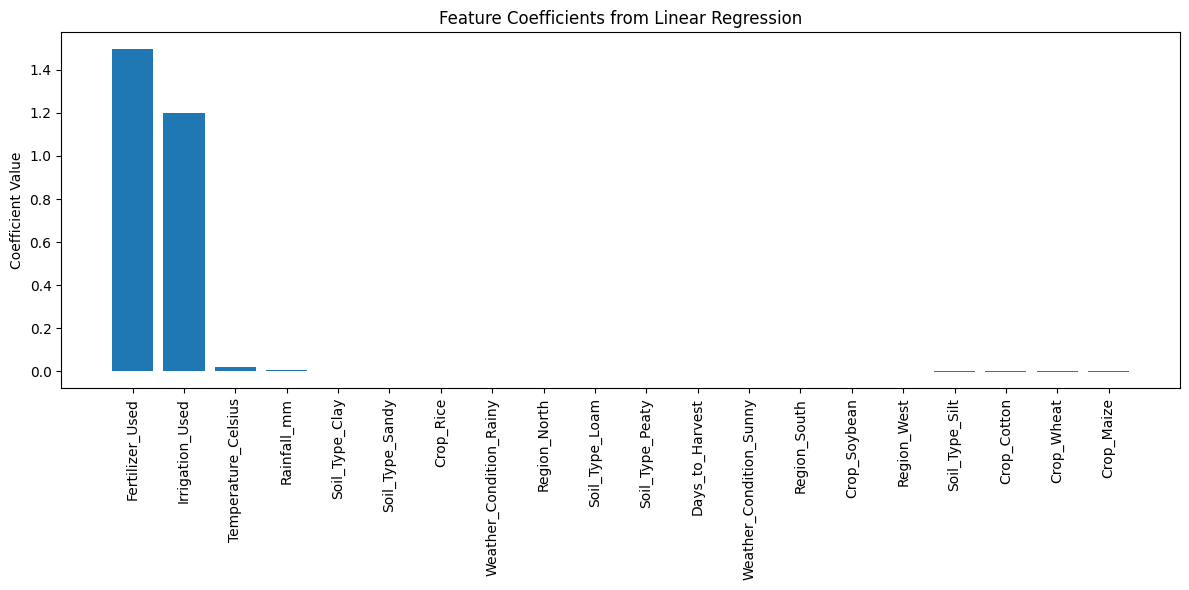

In [110]:
# plotting the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.xticks(rotation=90)
plt.title("Feature Coefficients from Linear Regression")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

# Experiment 2

In [111]:
# going to switch models to ridge regression to see if it performs better than linear regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge MSE: {mse_ridge:.2f}")
print(f"Ridge RMSE: {rmse_ridge:.2f}")
print(f"Ridge R²: {r2_ridge:.2f}")

Ridge MSE: 0.25
Ridge RMSE: 0.50
Ridge R²: 0.91


# Experiment 3

Since I tried 2 different regressions and didn't see any change, I want to try something non linear and see if it has an effect.

In [112]:
# going to try decision tree regression to see if it performs better than linear regression and ridge regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# prediction here
y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MSE: {mse_tree:.2f}")
print(f"Decision Tree RMSE: {rmse_tree:.2f}")
print(f"Decision Tree R²: {r2_tree:.2f}")

Decision Tree MSE: 0.53
Decision Tree RMSE: 0.73
Decision Tree R²: 0.82
